# Hello dropout denoising AutoEncoder for FMNIST dataset

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("TensorFlow Version: ", tf.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3
TensorFlow Version:  2.18.0


### Get Fashion MNIST Dataset

In [2]:
# Get dataset and split into training, validation, and test sets
f_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = f_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_val = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

### Build and train the Denoising AutoEncoder

In [3]:
tf.random.set_seed(42) 

ae_dropout_encoder = keras.Sequential([
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(100, activation="relu"),
    layers.Dense(30, activation="relu")
])
ae_dropout_decoder = keras.Sequential([
    layers.Dense(100, activation="relu"),
    keras.layers.Dense(28 * 28),
    layers.Reshape([28, 28])
])
ae_dropout = keras.Sequential([ae_dropout_encoder, ae_dropout_decoder])

ae_dropout.compile(loss="mse", optimizer="nadam")
         


In [5]:
# Note X_train used for both inputs and targets, same for validation data
history = ae_dropout.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))    

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0395 - val_loss: 0.0214
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0224 - val_loss: 0.0199
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0212 - val_loss: 0.0193
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0205 - val_loss: 0.0187
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0201 - val_loss: 0.0184
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0198 - val_loss: 0.0182
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0195 - val_loss: 0.0180
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0193 - val_loss: 0.0178
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0192 - val_loss: 0.0177
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0190 - val_loss: 0.0175


In [6]:
ae_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 30)             │        81,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │        82,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,445 (1.87 MB)

 Trainable params: 163,814 (639.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,631 (1.25 MB)

### Visualize Reconstruction from dropout images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


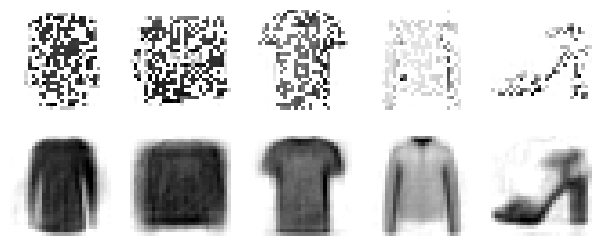

In [7]:
def viz_reconstructions(model, images=X_val, n_images=5):
    reconstruct = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstruct[image_index], cmap="binary")
        plt.axis("off")

dropout = layers.Dropout(0.5)
viz_reconstructions(ae_dropout, dropout(X_val, training=True))
plt.show()